In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder


In [23]:
df = pd.read_excel("/content/Health Assessment (Câu trả lời).xlsx")
df

,Dấu thời gian,What is your age?,What is your gender,What is your current weight? (in kilograms),What is your current height? (in meters),"How often do you do exercise or physical activities? (e.g., walking, running, sports)?","On average, how many hours of sleep do you get each night?",How many servings of fruits and vegetables do you eat on a typical day?,"Do you frequently consume sugary drinks (e.g., soda, energy drinks,...) ?",Do you frequently consume fast food?
0,2024-11-25 14:45:30.172,12,Male,12,2m,Regularly(5 or more days per week),2,3,Daily,Daily
1,2024-11-25 14:54:20.916,21,Male,72,174,Regularly(5 or more days per week),8,200g,Ocassionally,Never
2,2024-11-25 14:55:42.226,21,Male,48,1m69,Regularly(5 or more days per week),6,1,Ocassionally,Ocassionally
3,2024-11-25 14:56:20.081,21,Male,70,175,Regularly(5 or more days per week),7,1,Ocassionally,Ocassionally
4,2024-11-25 14:58:56.940,21,Male,70,175,Regularly(5 or more days per week),7,1,Ocassionally,Ocassionally
5,2024-11-25 14:59:10.410,56,Female,100,180,Never,10,1kg,Daily,Daily
6,2024-11-25 14:59:40.867,21,Male,70,175,Regularly(5 or more days per week),7,1,Ocassionally,Ocassionally
7,2024-11-25 14:59:54.725,5,Male,145,30,Sometimes(2-3 days per week),9,300g,Ocassionally,Ocassionally
8,2024-11-25 14:59:55.763,21,Male,70,1.75,Sometimes(2-3 days per week),8,Quite a lot,Never,Never
9,2024-11-25 15:00:23.488,21,Male,65,171,Regularly(5 or more days per week),7,1,Ocassionally,Ocassionally


In [24]:
# Extract all the string in the cells in column "What is your current weight? (in kilograms)"
df["What is your current weight? (in kilograms)"] = pd.to_numeric(
    df["What is your current weight? (in kilograms)"], errors='coerce'
).fillna(
    df["What is your current weight? (in kilograms)"].str.extract(r"(\d+\.?\d*)")[0]
)
# Check the result
df["What is your current weight? (in kilograms)"].value_counts

#Conver the columns to int
df["What is your current weight? (in kilograms)"] = pd.to_numeric(df["What is your current weight? (in kilograms)"], errors='coerce').fillna(0).astype(int)

In [25]:
# Extract all the "m" in the cells in column "What is your current height? (in meters)"
df["What is your current height? (in meters)"] = pd.to_numeric(
    df["What is your current height? (in meters)"], errors='coerce'
).fillna(
    df["What is your current height? (in meters)"].str.extract(r"(\d+)m(\d*)").apply(
        lambda x: int(x[0]) * 100 + int(x[1]) if pd.notnull(x[0]) and x[1] != '' else int(x[0]) if pd.notnull(x[0]) else np.nan, axis=1)
)
# Remove all the float values: 1.56 into 156
df["What is your current height? (in meters)"] = df["What is your current height? (in meters)"].apply( lambda x: int(x * 100) if isinstance(x, float) and not pd.isna(x) and x < 100 else x)

#Conver the columns to int
df["What is your current height? (in meters)"] = pd.to_numeric(df["What is your current height? (in meters)"], errors='coerce').fillna(0).astype(int)


In [ ]:
df

,Dấu thời gian,What is your age?,What is your gender,What is your current weight? (in kilograms),What is your current height? (in meters),"How often do you do exercise or physical activities? (e.g., walking, running, sports)?","On average, how many hours of sleep do you get each night?",How many servings of fruits and vegetables do you eat on a typical day?,"Do you frequently consume sugary drinks (e.g., soda, energy drinks,...) ?",Do you frequently consume fast food?
0,2024-11-25 14:45:30.172,12,Male,12,200,Regularly(5 or more days per week),2,3,Daily,Daily
1,2024-11-25 14:54:20.916,21,Male,72,174,Regularly(5 or more days per week),8,200g,Ocassionally,Never
2,2024-11-25 14:55:42.226,21,Male,48,169,Regularly(5 or more days per week),6,1,Ocassionally,Ocassionally
3,2024-11-25 14:56:20.081,21,Male,70,175,Regularly(5 or more days per week),7,1,Ocassionally,Ocassionally
4,2024-11-25 14:58:56.940,21,Male,70,175,Regularly(5 or more days per week),7,1,Ocassionally,Ocassionally
5,2024-11-25 14:59:10.410,56,Female,100,180,Never,10,1kg,Daily,Daily
6,2024-11-25 14:59:40.867,21,Male,70,175,Regularly(5 or more days per week),7,1,Ocassionally,Ocassionally
7,2024-11-25 14:59:54.725,5,Male,145,3000,Sometimes(2-3 days per week),9,300g,Ocassionally,Ocassionally
8,2024-11-25 14:59:55.763,21,Male,70,175,Sometimes(2-3 days per week),8,Quite a lot,Never,Never
9,2024-11-25 15:00:23.488,21,Male,65,171,Regularly(5 or more days per week),7,1,Ocassionally,Ocassionally


In [26]:
# Extract all the string in the cells in column "On average, how many hours of sleep do you get each night? "
df["On average, how many hours of sleep do you get each night? "] = pd.to_numeric(
    df["On average, how many hours of sleep do you get each night? "], errors='coerce'
).fillna(
    df["On average, how many hours of sleep do you get each night? "].str.extract(r"(\d+\.?\d*)")[0]
)

#Conver the columns to int
df["On average, how many hours of sleep do you get each night? "] = pd.to_numeric(df["On average, how many hours of sleep do you get each night? "], errors='coerce').fillna(0).astype(int)


In [27]:
# Extract all the string in the cells in column "How many servings of fruits and vegetables do you eat on a typical day?"
df["How many servings of fruits and vegetables do you eat on a typical day?"] = pd.to_numeric(
    df["How many servings of fruits and vegetables do you eat on a typical day?"], errors='coerce'
).fillna(
    df["How many servings of fruits and vegetables do you eat on a typical day?"].str.extract(r"(\d+\.?\d*)")[0]
)
# Fill na values with 1, since most answer refering to at least 1 serving
df["How many servings of fruits and vegetables do you eat on a typical day?"] = df["How many servings of fruits and vegetables do you eat on a typical day?"].fillna(1)
#Conver the columns to int
df["How many servings of fruits and vegetables do you eat on a typical day?"] = pd.to_numeric(df["How many servings of fruits and vegetables do you eat on a typical day?"] , errors='coerce').fillna(0).astype(int)
# Assuming 100g per serving: 200g -> 2 serving
df["How many servings of fruits and vegetables do you eat on a typical day?"] = df["How many servings of fruits and vegetables do you eat on a typical day?"].apply(
    lambda x: int(x/100) if isinstance(x, (int)) and not pd.isna(x) and x > 100 else x)

In [28]:
# Enocde the Gender columns using pd.dummy
# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply OneHotEncoder to the 'Gender' column
gender_encoded = encoder.fit_transform(df[["What is your gender"]])

# Convert the result into a DataFrame with column names as the categories
gender_encoded_df = pd.DataFrame(gender_encoded, columns=encoder.categories_[0])

# Join the original DataFrame with the one-hot encoded columns
df = df.join(gender_encoded_df)

# Remove the What is your gender columns
df.drop("What is your gender", axis = 1, inplace = True)

In [29]:
# Encode Other Categorical data
# Define the order of categories

exercise_level = ["Never", "Rarely(1 days per week)", "Sometimes(2-3 days per week)", "Regularly(5 or more days per week)"]
food_consumption_level = ["Never", "Ocassionally", "Daily"]

# Initialize OrdinalEncoder with the specified categories
encoder_exercise = OrdinalEncoder(categories=[exercise_level])
encoder_food_consumption = OrdinalEncoder(categories=[food_consumption_level])

# Apply OrdinalEncoder to the columns
df["How often do you do exercise or physical activities? (e.g., walking, running, sports)?"] = encoder_exercise.fit_transform(df[["How often do you do exercise or physical activities? (e.g., walking, running, sports)?"]])
df["Do you frequently consume sugary drinks (e.g., soda, energy drinks,...) ?"] = encoder_food_consumption.fit_transform(df[["Do you frequently consume sugary drinks (e.g., soda, energy drinks,...) ?"]])
df["Do you frequently consume fast food?"] = encoder_food_consumption.fit_transform(df[["Do you frequently consume fast food?"]])


In [30]:
# Create a BMI ccolumn
df["BMI"] = df["What is your current weight? (in kilograms)"] / ((df["What is your current height? (in meters)"] / 100) ** 2)

In [31]:
# Define label "Healthy"
df["healthy"] = df.apply(
    lambda row: "Yes" if (
        18.5 <= row["BMI"] <= 24.9 and
        row["How often do you do exercise or physical activities? (e.g., walking, running, sports)?"] >= 2 and
        row["Do you frequently consume sugary drinks (e.g., soda, energy drinks,...) ?"] <= 1 and
        row["Do you frequently consume fast food?"] <= 1 and
        6 <= row["On average, how many hours of sleep do you get each night? "] <= 8 and
        row["How many servings of fruits and vegetables do you eat on a typical day?"] >= 2
    ) else "No",
    axis=1
)
# Encode the label "Healthy" using pd.dummy
# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply OneHotEncoder to the 'Gender' column
healthy_encoded = encoder.fit_transform(df[["healthy"]])

# Convert the result into a DataFrame with column names as the categories
healthy_encoded_df = pd.DataFrame(healthy_encoded, columns=encoder.categories_[0])

# Join the original DataFrame with the one-hot encoded columns
df = df.join(healthy_encoded_df)


In [32]:
df

,Dấu thời gian,What is your age?,What is your current weight? (in kilograms),What is your current height? (in meters),"How often do you do exercise or physical activities? (e.g., walking, running, sports)?","On average, how many hours of sleep do you get each night?",How many servings of fruits and vegetables do you eat on a typical day?,"Do you frequently consume sugary drinks (e.g., soda, energy drinks,...) ?",Do you frequently consume fast food?,Female,Male,BMI,healthy,No,Yes
0,2024-11-25 14:45:30.172,12,12,200,3.0,2,3,2.0,2.0,0.0,1.0,3.000000,No,1.0,0.0
1,2024-11-25 14:54:20.916,21,72,174,3.0,8,2,1.0,0.0,0.0,1.0,23.781213,Yes,0.0,1.0
2,2024-11-25 14:55:42.226,21,48,169,3.0,6,1,1.0,1.0,0.0,1.0,16.806134,No,1.0,0.0
3,2024-11-25 14:56:20.081,21,70,175,3.0,7,1,1.0,1.0,0.0,1.0,22.857143,No,1.0,0.0
4,2024-11-25 14:58:56.940,21,70,175,3.0,7,1,1.0,1.0,0.0,1.0,22.857143,No,1.0,0.0
5,2024-11-25 14:59:10.410,56,100,180,0.0,10,1,2.0,2.0,1.0,0.0,30.864198,No,1.0,0.0
6,2024-11-25 14:59:40.867,21,70,175,3.0,7,1,1.0,1.0,0.0,1.0,22.857143,No,1.0,0.0
7,2024-11-25 14:59:54.725,5,145,3000,2.0,9,3,1.0,1.0,0.0,1.0,0.161111,No,1.0,0.0
8,2024-11-25 14:59:55.763,21,70,175,2.0,8,1,0.0,0.0,0.0,1.0,22.857143,No,1.0,0.0
9,2024-11-25 15:00:23.488,21,65,171,3.0,7,1,1.0,1.0,0.0,1.0,22.229062,No,1.0,0.0


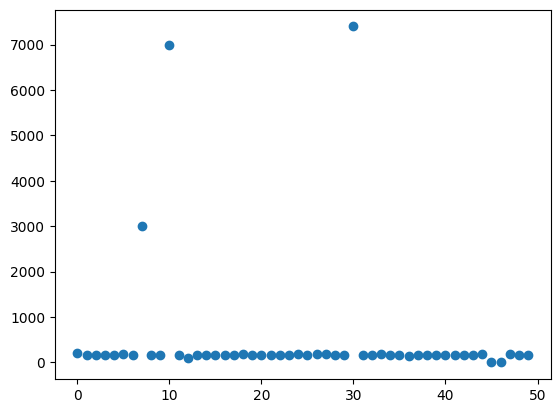

In [ ]:
plt.scatter(df.index, df['What is your current height? (in meters)'])

In [ ]:
df[['What is your current height? (in meters)']].apply(pd.Series.value_counts, bins = [0,100,150,170,180,190,220,1000000])

,What is your current height? (in meters)
"(170.0, 180.0]",21
"(150.0, 170.0]",19
"(220.0, 1000000.0]",3
"(-0.001, 100.0]",2
"(100.0, 150.0]",2
"(180.0, 190.0]",2
"(190.0, 220.0]",1


In [ ]:
index1 = df[lambda x: x['What is your current height? (in meters)'] > 220][:].index
df.drop(index1, inplace = True)

In [ ]:
df.describe()

,Dấu thời gian,What is your age?,What is your current weight? (in kilograms),What is your current height? (in meters),"How often do you do exercise or physical activities? (e.g., walking, running, sports)?","On average, how many hours of sleep do you get each night?",How many servings of fruits and vegetables do you eat on a typical day?,"Do you frequently consume sugary drinks (e.g., soda, energy drinks,...) ?",Do you frequently consume fast food?,Female,Male,BMI
count,47,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,2024-11-26 12:54:20.345212672,21.553191,65.617021,162.680851,1.829787,6.723404,1.914894,0.851064,0.829787,0.319149,0.680851,inf
min,2024-11-25 14:45:30.172000,12.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000300
25%,2024-11-25 15:46:13.101500160,19.000000,59.000000,166.000000,1.000000,6.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.002046
50%,2024-11-26 09:43:47.467000064,21.000000,65.000000,171.000000,2.000000,7.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.002264
75%,2024-11-26 13:33:27.769500160,21.000000,73.500000,175.000000,3.000000,8.000000,2.500000,1.000000,1.000000,1.000000,1.000000,0.002439
max,2024-12-02 09:26:33.413000,56.000000,100.000000,200.000000,3.000000,10.000000,10.000000,2.000000,2.000000,1.000000,1.000000,inf
std,NaN,6.064180,14.622129,36.816293,1.028277,1.651115,1.626276,0.550838,0.524162,0.471186,0.471186,NaN


In [ ]:
df

,Dấu thời gian,What is your age?,What is your current weight? (in kilograms),What is your current height? (in meters),"How often do you do exercise or physical activities? (e.g., walking, running, sports)?","On average, how many hours of sleep do you get each night?",How many servings of fruits and vegetables do you eat on a typical day?,"Do you frequently consume sugary drinks (e.g., soda, energy drinks,...) ?",Do you frequently consume fast food?,Female,Male,BMI
0,2024-11-25 14:45:30.172,12,12,200,3.0,2,3,2.0,2.0,0.0,1.0,0.000300
1,2024-11-25 14:54:20.916,21,72,174,3.0,8,2,1.0,0.0,0.0,1.0,0.002378
2,2024-11-25 14:55:42.226,21,48,169,3.0,6,1,1.0,1.0,0.0,1.0,0.001681
3,2024-11-25 14:56:20.081,21,70,175,3.0,7,1,1.0,1.0,0.0,1.0,0.002286
4,2024-11-25 14:58:56.940,21,70,175,3.0,7,1,1.0,1.0,0.0,1.0,0.002286
5,2024-11-25 14:59:10.410,56,100,180,0.0,10,1,2.0,2.0,1.0,0.0,0.003086
6,2024-11-25 14:59:40.867,21,70,175,3.0,7,1,1.0,1.0,0.0,1.0,0.002286
8,2024-11-25 14:59:55.763,21,70,175,2.0,8,1,0.0,0.0,0.0,1.0,0.002286
9,2024-11-25 15:00:23.488,21,65,171,3.0,7,1,1.0,1.0,0.0,1.0,0.002223
11,2024-11-25 15:08:24.487,21,58,170,2.0,7,3,0.0,0.0,0.0,1.0,0.002007


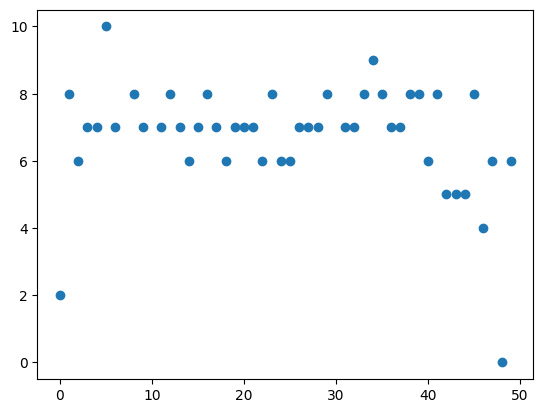

In [ ]:
plt.scatter(df.index, df['On average, how many hours of sleep do you get each night? '])

In [ ]:
index1 = df[lambda x: x['On average, how many hours of sleep do you get each night? '] < 3][:].index
df.drop(index1, inplace = True)

In [ ]:
df

,Dấu thời gian,What is your age?,What is your current weight? (in kilograms),What is your current height? (in meters),"How often do you do exercise or physical activities? (e.g., walking, running, sports)?","On average, how many hours of sleep do you get each night?",How many servings of fruits and vegetables do you eat on a typical day?,"Do you frequently consume sugary drinks (e.g., soda, energy drinks,...) ?",Do you frequently consume fast food?,Female,Male,BMI
1,2024-11-25 14:54:20.916,21,72,174,3.0,8,2,1.0,0.0,0.0,1.0,0.002378
2,2024-11-25 14:55:42.226,21,48,169,3.0,6,1,1.0,1.0,0.0,1.0,0.001681
3,2024-11-25 14:56:20.081,21,70,175,3.0,7,1,1.0,1.0,0.0,1.0,0.002286
4,2024-11-25 14:58:56.940,21,70,175,3.0,7,1,1.0,1.0,0.0,1.0,0.002286
5,2024-11-25 14:59:10.410,56,100,180,0.0,10,1,2.0,2.0,1.0,0.0,0.003086
6,2024-11-25 14:59:40.867,21,70,175,3.0,7,1,1.0,1.0,0.0,1.0,0.002286
8,2024-11-25 14:59:55.763,21,70,175,2.0,8,1,0.0,0.0,0.0,1.0,0.002286
9,2024-11-25 15:00:23.488,21,65,171,3.0,7,1,1.0,1.0,0.0,1.0,0.002223
11,2024-11-25 15:08:24.487,21,58,170,2.0,7,3,0.0,0.0,0.0,1.0,0.002007
12,2024-11-25 15:21:23.177,21,73,107,1.0,8,1,2.0,1.0,0.0,1.0,0.006376


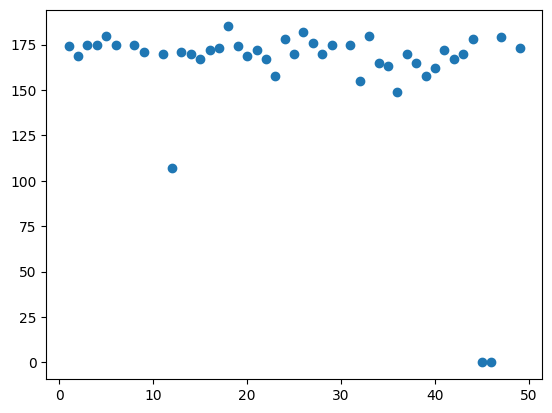

In [ ]:
plt.scatter(df.index, df['What is your current height? (in meters)'])

In [ ]:
index1 = df[lambda x: x['What is your current height? (in meters)'] < 125][:].index
df.drop(index1, inplace = True)

In [ ]:
df


,Dấu thời gian,What is your age?,What is your current weight? (in kilograms),What is your current height? (in meters),"How often do you do exercise or physical activities? (e.g., walking, running, sports)?","On average, how many hours of sleep do you get each night?",How many servings of fruits and vegetables do you eat on a typical day?,"Do you frequently consume sugary drinks (e.g., soda, energy drinks,...) ?",Do you frequently consume fast food?,Female,Male,BMI
1,2024-11-25 14:54:20.916,21,72,174,3.0,8,2,1.0,0.0,0.0,1.0,0.002378
2,2024-11-25 14:55:42.226,21,48,169,3.0,6,1,1.0,1.0,0.0,1.0,0.001681
3,2024-11-25 14:56:20.081,21,70,175,3.0,7,1,1.0,1.0,0.0,1.0,0.002286
4,2024-11-25 14:58:56.940,21,70,175,3.0,7,1,1.0,1.0,0.0,1.0,0.002286
5,2024-11-25 14:59:10.410,56,100,180,0.0,10,1,2.0,2.0,1.0,0.0,0.003086
6,2024-11-25 14:59:40.867,21,70,175,3.0,7,1,1.0,1.0,0.0,1.0,0.002286
8,2024-11-25 14:59:55.763,21,70,175,2.0,8,1,0.0,0.0,0.0,1.0,0.002286
9,2024-11-25 15:00:23.488,21,65,171,3.0,7,1,1.0,1.0,0.0,1.0,0.002223
11,2024-11-25 15:08:24.487,21,58,170,2.0,7,3,0.0,0.0,0.0,1.0,0.002007
13,2024-11-25 15:32:43.916,21,60,171,2.0,7,2,1.0,1.0,1.0,0.0,0.002052
